In [1]:
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Bike Assignment Linear Regression.ipynb',
 'Data Dictionararies.odt',
 'day.csv',
 'Evaluation Rubics.odt',
 'Linear Regression Assignment.odt',
 '~$aluation Rubics.odt',
 '~$near Regression Assignment.odt',
 '~$ta Dictionararies.odt']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
bike = pd.read_csv("day.csv")

In [5]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [6]:
bike.drop('dteday',axis = 1,inplace = True)
y = bike['cnt']
bike.drop('cnt',axis = 1,inplace = True)

In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [8]:
bike.describe(include = 'all')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000


In [9]:
bike.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

C:\Users\rimmadisetty\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

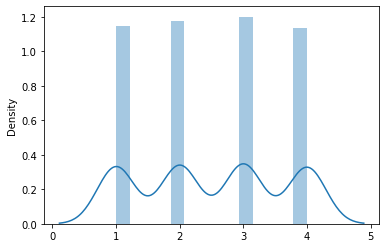

In [10]:
sns.distplot(x=bike['season'])

C:\Users\rimmadisetty\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

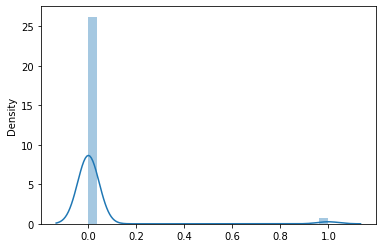

In [11]:
sns.distplot(x=bike['holiday'])

C:\Users\rimmadisetty\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

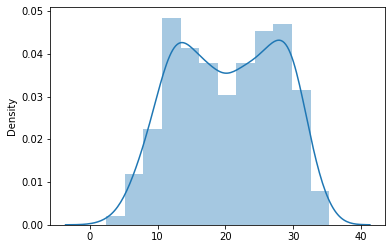

In [12]:
sns.distplot(x=bike['temp'])

<AxesSubplot:>

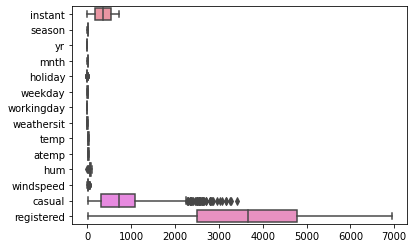

In [13]:
sns.boxplot(data = bike,orient = 'h')

In [14]:
bike.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [15]:
featu = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']

<AxesSubplot:xlabel='season'>

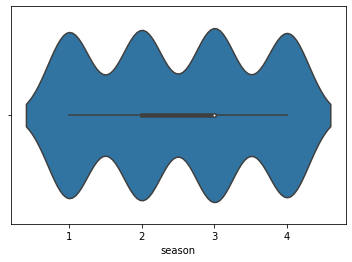

In [16]:
sns.violinplot(x=bike['season'])

<AxesSubplot:xlabel='weathersit'>

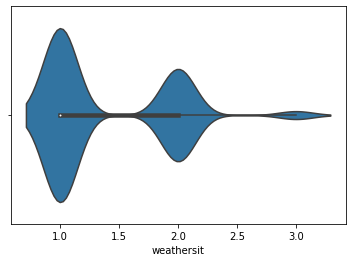

In [17]:
sns.violinplot(x=bike['weathersit'],data=bike)

In [18]:
outlie = []
def detect_outlier_iqr(bike,feature):
    IQR = np.percentile(bike[feature],75) - np.percentile(bike[feature],25)     
    LB  = np.percentile(bike[feature],25) - 1.5*IQR
    UB  = np.percentile(bike[feature],75) + 1.5*IQR
   # coun = ((bike[feature] > UB) | (bike[feature] < LB)).sum()
    count = ((bike[feature] > UB ) | (bike[feature] < LB)).sum()
    li = []
    for x in bike[feature]:
        if (x > UB) | (x < LB):
            li.append(x)
    print(feature)
    print(f'LB is {LB} and  UB is {UB}  no_of_outliers {count} ')
   # print(li)
    if count > 0:
        outlie.append(feature)   

In [19]:
outlie = []
for feat in bike.columns:
    detect_outlier_iqr(bike,feat)
outlie

instant
LB is -363.5 and  UB is 1094.5  no_of_outliers 0 
season
LB is 0.5 and  UB is 4.5  no_of_outliers 0 
yr
LB is -1.5 and  UB is 2.5  no_of_outliers 0 
mnth
LB is -5.0 and  UB is 19.0  no_of_outliers 0 
holiday
LB is 0.0 and  UB is 0.0  no_of_outliers 21 
weekday
LB is -5.0 and  UB is 11.0  no_of_outliers 0 
workingday
LB is -1.5 and  UB is 2.5  no_of_outliers 0 
weathersit
LB is -0.5 and  UB is 3.5  no_of_outliers 0 
temp
LB is -5.7912089999999985 and  UB is 46.483709  no_of_outliers 0 
atemp
LB is -3.444381249999992 and  UB is 50.77986874999999  no_of_outliers 0 
hum
LB is 20.515637499999997 and  UB is 104.4739375  no_of_outliers 2 
windspeed
LB is -0.8342588749999997 and  UB is 25.501498125  no_of_outliers 13 
casual
LB is -854.125 and  UB is 2266.875  no_of_outliers 44 
registered
LB is -919.25 and  UB is 8204.75  no_of_outliers 0 


['holiday', 'hum', 'windspeed', 'casual']

C:\Users\rimmadisetty\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

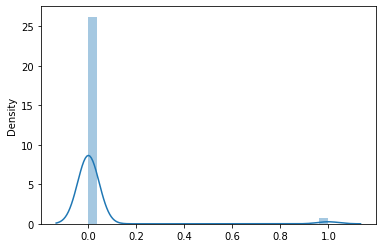

In [20]:
sns.distplot(x=bike['holiday'])

In [21]:
def value_coun(bike,feature):
    print(bike[feature].value_counts())

In [22]:
for feat in outlie:
    value_coun(bike,feat)

0    709
1     21
Name: holiday, dtype: int64
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64
9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64
120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64


## holiday is not outlier feature since it has only two values

In [23]:
outlie

['holiday', 'hum', 'windspeed', 'casual']

In [24]:
outlie.remove('holiday')

In [25]:
outlie

['hum', 'windspeed', 'casual']

<AxesSubplot:xlabel='hum'>

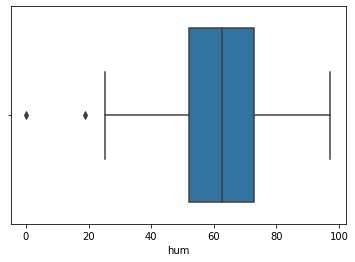

In [26]:
sns.boxplot(x=bike['hum'])

In [27]:
bike['hum'] = bike['hum'].apply( lambda x : np.mean(bike['hum']) if ((x <= 20.51) | (x >= 104.51)) else x)

In [28]:
np.mean(bike['hum'])

62.91139226008632

<AxesSubplot:xlabel='windspeed'>

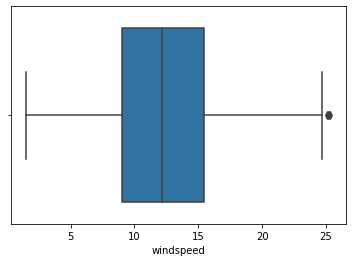

In [32]:
sns.boxplot(x=bike['windspeed'])

In [33]:
detect_outlier_iqr(bike,'windspeed')

windspeed
LB is -0.504719374999997 and  UB is 24.952265624999995  no_of_outliers 4 


In [31]:
bike['windspeed'] = bike['windspeed'].apply( lambda x : np.median(bike['windspeed']) if ((x <= -0.8342) | (x >= 25.50)) else x)

<AxesSubplot:xlabel='casual'>

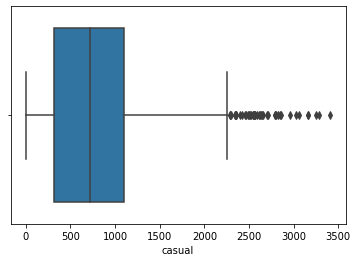

In [32]:
sns.boxplot(x=bike['casual'])

In [33]:
detect_outlier_iqr(bike,'casual')

LB is -854.125 and  UB is 2266.875 for the casual count 44 
[2355, 2282, 3065, 2418, 2521, 2397, 3155, 2469, 2301, 2347, 3252, 2795, 2846, 2541, 2496, 2622, 3410, 2704, 2855, 3283, 2557, 2795, 2494, 2708, 2963, 2634, 2657, 2551, 2562, 2355, 2544, 2345, 2827, 2352, 2613, 2570, 3160, 2512, 2454, 2589, 3031, 2806, 2643, 2290]


In [34]:
def imputeoutl(x):
    lb = -854.125
    ub = 2266.87
    if ((x >= lb) & (x <= ub)):
        return x
    if x <= lb:
        return lb
    if x >= ub:
        return ub

In [35]:
bike['casual'] = bike['casual'].apply( lambda x : imputeoutl(x))

In [36]:
for feat in bike.columns:
    detect_outlier_iqr(bike,feat)
outlie

LB is -363.5 and  UB is 1094.5 for the instant count 0 
[]
LB is 0.5 and  UB is 4.5 for the season count 0 
[]
LB is -1.5 and  UB is 2.5 for the yr count 0 
[]
LB is -5.0 and  UB is 19.0 for the mnth count 0 
[]
LB is 0.0 and  UB is 0.0 for the holiday count 21 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
LB is -5.0 and  UB is 11.0 for the weekday count 0 
[]
LB is -1.5 and  UB is 2.5 for the workingday count 0 
[]
LB is -0.5 and  UB is 3.5 for the weathersit count 0 
[]
LB is -5.7912089999999985 and  UB is 46.483709 for the temp count 0 
[]
LB is -3.444381249999992 and  UB is 50.77986874999999 for the atemp count 0 
[]
LB is 21.062449999999995 and  UB is 104.14585000000001 for the hum count 0 
[]
LB is -0.39610399999999935 and  UB is 24.77124 for the windspeed count 0 
[]
LB is -854.125 and  UB is 2266.875 for the casual count 0 
[]
LB is -919.25 and  UB is 8204.75 for the registered count 0 
[]


['hum', 'windspeed', 'casual', 'windspeed', 'casual', 'holiday']

# Now we have to scale data

In [37]:
bike

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331.0,654
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131.0,670
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120.0,1229
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108.0,1454
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82.0,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247.0,1867
726,727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644.0,2451
727,728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159.0,1182
728,729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364.0,1432


In [38]:
from sklearn import preprocessing

In [39]:
standard = preprocessing.StandardScaler()

In [40]:
bike = standard.fit_transform(bike)

In [41]:
bike.shape

(730, 14)

In [42]:
bike

array([[-1.72967976, -1.35081907, -1.        , ..., -0.35861803,
        -0.79360519, -1.92774539],
       [-1.72493441, -1.35081907, -1.        , ...,  0.90448603,
        -1.11461952, -1.91748036],
       [-1.72018906, -1.35081907, -1.        , ...,  0.90118822,
        -1.13227531, -1.55884588],
       ...,
       [ 1.72018906, -1.35081907,  1.        , ..., -0.87570022,
        -1.06967751, -1.5889994 ],
       [ 1.72493441, -1.35081907,  1.        , ...,  2.3700756 ,
        -0.74063783, -1.42860831],
       [ 1.72967976, -1.35081907,  1.        , ..., -0.43891252,
        -0.62025746, -0.87814607]])

## Model building

In [44]:
LinearReg  =  LinearRegression()

In [45]:
LinearReg.fit(bike,y)

LinearRegression()

In [46]:
LinearReg?

In [47]:
LinearReg.coef_

array([ 7.01873385e+00, -5.45820270e+00,  6.86603668e+00, -7.33258929e-01,
        5.37492897e+00,  9.58928116e+00,  1.47430518e+01,  5.60424875e+00,
       -3.50522033e+01,  1.61087524e+01, -2.31002534e+00,  3.29149179e+00,
        7.03350175e+02,  1.53932167e+03])

In [48]:
LinearReg.intercept_

4508.006849315068

In [49]:
y_test = LinearReg.predict(bike)

In [50]:
y_test

array([ 983.88196572,  746.53054772, 1332.43042529, 1540.76232315,
       1579.76145318, 1590.13161746, 1522.06539346,  945.16625132,
        775.65704817, 1296.82021039, 1247.30458607, 1145.82802278,
       1395.95052913, 1412.99479053, 1243.45390508, 1165.77197642,
        997.02042799,  663.12419939, 1629.63976764, 1913.06090775,
       1542.50691118,  970.43047469,  952.46827542, 1401.23511587,
       1976.36361291,  511.1271093 ,  418.90911229, 1161.5561806 ,
       1071.8603965 , 1039.03215698, 1479.76297631, 1338.36270902,
       1510.48268144, 1539.80498126, 1705.60147508,  979.23056325,
       1586.31396055, 1674.18078892, 1508.91723378, 1600.23430785,
       1528.94262911, 1744.8519452 , 1466.39264859, 1563.83495885,
       1880.11411157, 1798.59641049, 2103.16284812, 2455.52399961,
       2945.20321675, 1641.92381629, 1818.92007266, 1105.10826349,
       1429.47306803, 1900.77651262, 1794.71446864, 1457.84357453,
       1969.59263124, 2396.59659401, 1409.76776999, 1827.62410

In [79]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y)))

RMSE 100.18199909024511


In [80]:
print("r2_score",r2_score(y_test,y))

r2_score 0.9973114082528595
